# Estudio sobre las tendencias de compra.

![Texto Alternativo](imagen_portada.png)

## Definición de preguntas y problemas

Vamos a estudiar las tendencias de compra de los clientes, tendremos un gran conjunto de datos y con ellos trataremos de averiguar muchismos datos relacionados con las compras.

## Objetivos del proyecto

El flujo de trabajo de este __proyecto de ciencia de datos__ resuelve __siete objetivos__ principales.

* __Clasificación.__ Es posible que deseemos clasificar o categorizar nuestras muestras. También es posible que deseemos comprender las implicaciones o la correlación de diferentes clases con nuestro objetivo.


* __Correlación.__ Se puede abordar el problema en función de las características disponibles dentro del conjunto de datos de entrenamiento. ¿Qué características dentro del conjunto de datos contribuyen significativamente a nuestro objetivo de solución? Hablando estadísticamente, ¿existe una correlación entre una característica y el objetivo de la solución? A medida que cambian los valores de las funciones, ¿cambia también el estado de la solución y viceversa? Esto se puede probar tanto para características numéricas como categóricas en el conjunto de datos dado. También es posible que deseemos determinar la correlación entre características distintas de la supervivencia para los objetivos posteriores y las etapas del flujo de trabajo. Correlacionar ciertas características puede ayudar a crear, completar o corregir características.


* __Conversión.__ Para la etapa de modelado, es necesario preparar los datos. Dependiendo de la elección del modelo de algoritmo, se puede requerir que todas las características se conviertan a valores numéricos equivalentes. Por ejemplo, convertir valores categóricos de texto en valores numéricos.


* __Completado.__ La preparación de datos también puede requerir que estimemos los valores faltantes dentro de una característica. Los algoritmos de modelado pueden funcionar mejor cuando no faltan valores.


* __Corrección.__ También podemos analizar el conjunto de datos de entrenamiento dado en busca de errores o posibles valores inexactos dentro de las características e intentar corregir estos valores o excluir las muestras que contienen los errores. Una forma de hacerlo es detectar cualquier valor atípico entre nuestras muestras o características. También podemos descartar completamente una característica si no contribuye al análisis o puede sesgar significativamente los resultados.


* __Creación.__ ¿Podemos crear nuevas características basadas en una característica existente o un conjunto de características, de modo que la nueva característica siga los objetivos de correlación, conversión e integridad?


* __Gráficos.__ Cómo seleccionar los gráficos y diagramas de visualización correctos según la naturaleza de los datos y los objetivos de la solución.

In [1]:
#pip install sklearn
#pip install pandas
#pip install numpy
#pip install random
#pip install seaborn
#pip install matplotlib




In [2]:
# Análisis de datos
import pandas as pd
import numpy as np
import random as rnd

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



## Cargar datos y primera visualización

Pandas nos va ayudar a trabajar con nuestros conjuntos de datos. Comenzamos cargando los conjuntos de datos de entrenamiento y prueba y convirtiendolos a DataFrames de Pandas. También combinamos estos conjuntos de datos para ejecutar ciertas operaciones en ambos conjuntos de datos juntos.

In [3]:
df = pd.read_csv('./shopping_trends_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Primer analisis del dataframe



In [4]:
# Resumen del DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
# Resumen estadístico
df.describe()


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [6]:
df.describe(include=['O']) 

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


In [7]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [8]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [9]:
# Contar los tipos únicos en cada columna
tipos_unicos = df.nunique()

# Imprimir el resultado
print(tipos_unicos)


Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64


### Vamos hacer un rango de edades

* Vamos a crear 6 rangos de edad.
-  0  (de 0 a 12 años) **Niños**
-  1  (12 a 18 años) **Adolescentes**
-  2  (18 a 30 años) **Jovenes**
-  3  (30 a 50 años) **Adulto Joven**
-  4  (50 a 65 años) **Adulto**
-  5  (+65 años) **Jubilados**

In [10]:
# Definimos los límites de cada grupo de edad
limites = [0, 12, 18, 30, 50, 65, float('inf')]  # Usamos float('inf') para representar "infinito" o mayores de 65

# Definimos las etiquetas para cada grupo
rango_edad = [0, 1, 2, 3, 4, 5]  # Cada número representa un rango de edad

# Usamos pd.cut para asignar cada edad a su respectivo grupo
df['Rango edad'] = pd.cut(df['Age'], bins=limites, labels=rango_edad, right=False)

# Eliminar la columna 'Edad'
df.drop('Age', axis=1, inplace=True)



In [11]:
df.head()

,Customer ID,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Rango edad
0,1,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,4
1,2,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,2
2,3,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,4
3,4,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,2
4,5,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,3


In [12]:
# Lista de todas las columnas en el DataFrame
columnas = df.columns.tolist()

# Remover la columna
columnas.remove('Rango edad')

# Insertar la columna en la posición deseada
posicion_deseada = 3
columnas.insert(posicion_deseada, 'Rango edad')

# Reordenar el DataFrame con el nuevo orden de columnas
df = df.reindex(columns=columnas)


In [13]:
df.head()

,Customer ID,Gender,Item Purchased,Rango edad,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,Male,Blouse,4,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,Male,Sweater,2,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,Male,Jeans,4,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,Male,Sandals,2,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,Male,Blouse,3,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [14]:
df.head()

,Customer ID,Gender,Item Purchased,Rango edad,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,Male,Blouse,4,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,Male,Sweater,2,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,Male,Jeans,4,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,Male,Sandals,2,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,Male,Blouse,3,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Vamos a pasar las columnas a castellano

In [15]:
df.rename(columns={
    'Customer ID': 'Id',
    'Gender': 'Sexo',
    'Item Purchased': 'Articulo',
    'Category': 'Categoria del articulo',
    'Purchase Amount (USD)':'Importe',
    'Location' : "Lugar",
    'Size' : 'Talla',
    'Season' : 'Estacion',
    'Review Rating' : 'Puntuacion',
    'Subscription Status' : 'Suscripcion',
    'Shipping Type' : "Envio",
    'Discount Applied' : 'Descuento',
    'Promo Code Used' : 'Codigo Promo',
    'Previous Purchases': 'Historial Compras',
    'Payment Method' : "Forma Pago"
}, inplace=True)

In [16]:
df.head()

,Id,Sexo,Articulo,Rango edad,Categoria del articulo,Importe,Lugar,Talla,Color,Estacion,Puntuacion,Suscripcion,Envio,Descuento,Codigo Promo,Historial Compras,Forma Pago,Frequency of Purchases
0,1,Male,Blouse,4,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,Male,Sweater,2,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,Male,Jeans,4,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,Male,Sandals,2,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,Male,Blouse,3,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Eliminacion de columnas no relevantes

In [17]:
eliminar_columnas = ["Id" , "Frequency of Purchases" , "Articulo" , 'Color' , 'Puntuacion']
df = df.drop(eliminar_columnas, axis=1)
df


,Sexo,Rango edad,Categoria del articulo,Importe,Lugar,Talla,Estacion,Suscripcion,Envio,Descuento,Codigo Promo,Historial Compras,Forma Pago
0,Male,4,Clothing,53,Kentucky,L,Winter,Yes,Express,Yes,Yes,14,Venmo
1,Male,2,Clothing,64,Maine,L,Winter,Yes,Express,Yes,Yes,2,Cash
2,Male,4,Clothing,73,Massachusetts,S,Spring,Yes,Free Shipping,Yes,Yes,23,Credit Card
3,Male,2,Footwear,90,Rhode Island,M,Spring,Yes,Next Day Air,Yes,Yes,49,PayPal
4,Male,3,Clothing,49,Oregon,M,Spring,Yes,Free Shipping,Yes,Yes,31,PayPal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,Female,3,Clothing,28,Virginia,L,Summer,No,2-Day Shipping,No,No,32,Venmo
3896,Female,4,Accessories,49,Iowa,L,Spring,No,Store Pickup,No,No,41,Bank Transfer
3897,Female,3,Accessories,33,New Jersey,L,Spring,No,Standard,No,No,24,Venmo
3898,Female,3,Footwear,77,Minnesota,S,Summer,No,Express,No,No,24,Venmo


### Categoria
Hemos eliminado la columna articulos ya que tenemos una categoria donde estan ubicados, (Footwear, Clothing, Accessories)
Vamos a darle valores a esas 3 categorias
- 1 Clothing
- 2 Footwear
- 3 Accessories

In [18]:
columna_categorias = df["Categoria del articulo"]
categorias_unicas = columna_categorias.unique()

# Ahora, 'categorias_unicas' contiene una lista de las categorías únicas en la columna "Categoría"
print(categorias_unicas)


['Clothing' 'Footwear' 'Outerwear' 'Accessories']


In [19]:
# Usaremos la función replace de pandas para unificar dos categorías
df['Categoria del articulo'] = df['Categoria del articulo'].replace('Outerwear', 'Clothing')


In [20]:
print(df['Categoria del articulo'])

0          Clothing
1          Clothing
2          Clothing
3          Footwear
4          Clothing
           ...     
3895       Clothing
3896    Accessories
3897    Accessories
3898       Footwear
3899    Accessories
Name: Categoria del articulo, Length: 3900, dtype: object


In [21]:
categorias_unicas = df['Categoria del articulo'].unique()
print(categorias_unicas)

['Clothing' 'Footwear' 'Accessories']


In [22]:
# Utiliza la función replace() para asignar valores enteros a las categorías
df['Categoria del articulo'] = df['Categoria del articulo'].replace({'Clothing': 1, 'Footwear': 2, 'Accessories': 3})



In [23]:
categorias_unicas = df['Categoria del articulo'].unique()
print(categorias_unicas)
df

[1 2 3]


,Sexo,Rango edad,Categoria del articulo,Importe,Lugar,Talla,Estacion,Suscripcion,Envio,Descuento,Codigo Promo,Historial Compras,Forma Pago
0,Male,4,1,53,Kentucky,L,Winter,Yes,Express,Yes,Yes,14,Venmo
1,Male,2,1,64,Maine,L,Winter,Yes,Express,Yes,Yes,2,Cash
2,Male,4,1,73,Massachusetts,S,Spring,Yes,Free Shipping,Yes,Yes,23,Credit Card
3,Male,2,2,90,Rhode Island,M,Spring,Yes,Next Day Air,Yes,Yes,49,PayPal
4,Male,3,1,49,Oregon,M,Spring,Yes,Free Shipping,Yes,Yes,31,PayPal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,Female,3,1,28,Virginia,L,Summer,No,2-Day Shipping,No,No,32,Venmo
3896,Female,4,3,49,Iowa,L,Spring,No,Store Pickup,No,No,41,Bank Transfer
3897,Female,3,3,33,New Jersey,L,Spring,No,Standard,No,No,24,Venmo
3898,Female,3,2,77,Minnesota,S,Summer,No,Express,No,No,24,Venmo


### Sexo
Con el sexo tambien haremos lo mismo y le daremos valores numericos.
- 0 Female
- 1 Male

In [24]:
# Utiliza la función replace() para asignar valores enteros a las categorías
df['Sexo'] = df['Sexo'].replace({'Female': 0, 'Male': 1})
df

,Sexo,Rango edad,Categoria del articulo,Importe,Lugar,Talla,Estacion,Suscripcion,Envio,Descuento,Codigo Promo,Historial Compras,Forma Pago
0,1,4,1,53,Kentucky,L,Winter,Yes,Express,Yes,Yes,14,Venmo
1,1,2,1,64,Maine,L,Winter,Yes,Express,Yes,Yes,2,Cash
2,1,4,1,73,Massachusetts,S,Spring,Yes,Free Shipping,Yes,Yes,23,Credit Card
3,1,2,2,90,Rhode Island,M,Spring,Yes,Next Day Air,Yes,Yes,49,PayPal
4,1,3,1,49,Oregon,M,Spring,Yes,Free Shipping,Yes,Yes,31,PayPal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,3,1,28,Virginia,L,Summer,No,2-Day Shipping,No,No,32,Venmo
3896,0,4,3,49,Iowa,L,Spring,No,Store Pickup,No,No,41,Bank Transfer
3897,0,3,3,33,New Jersey,L,Spring,No,Standard,No,No,24,Venmo
3898,0,3,2,77,Minnesota,S,Summer,No,Express,No,No,24,Venmo


### Regiones
Tenemos 50 estados diferentes, los agruparemos en Oeste, Centro y Este.
- 1 **Oeste**
- 2 **Centro**
- 3 **Este**
- Los estados de Hawai y Alaska los agrupamos en el Este, es decir en el 3.


In [25]:
# Utiliza el método nunique() para contar ciudades diferentes
ciudades_diferentes = df['Lugar'].nunique()

# Imprime el número de ciudades diferentes
print("Número de ciudades diferentes:", ciudades_diferentes)


Número de ciudades diferentes: 50


In [26]:
# Utiliza el método unique() para obtener los nombres de las ciudades sin repeticiones
ciudades_unicas = df['Lugar'].unique()

# Imprime los nombres de las ciudades únicas
for ciudad in ciudades_unicas:
    print(ciudad)


Kentucky
Maine
Massachusetts
Rhode Island
Oregon
Wyoming
Montana
Louisiana
West Virginia
Missouri
Arkansas
Hawaii
Delaware
New Hampshire
New York
Alabama
Mississippi
North Carolina
California
Oklahoma
Florida
Texas
Nevada
Kansas
Colorado
North Dakota
Illinois
Indiana
Arizona
Alaska
Tennessee
Ohio
New Jersey
Maryland
Vermont
New Mexico
South Carolina
Idaho
Pennsylvania
Connecticut
Utah
Virginia
Georgia
Nebraska
Iowa
South Dakota
Minnesota
Washington
Wisconsin
Michigan


In [27]:
# Definición de las regiones
estados_este = ["Maine", "Connecticut,","Massachusetts", "Rhode Island", "New Hampshire", "Vermont", "New York", "Pennsylvania", "New Jersey", "Delaware", "Maryland", "Virginia", "West Virginia", "North Carolina", "South Carolina", "Georgia", "Florida", "Alabama", "Mississippi", "Louisiana"]
estados_centro = ["Ohio", "Michigan", "Indiana", "Kentucky", "Tennessee", "Wisconsin", "Illinois", "Minnesota", "Iowa", "Missouri", "Arkansas", "Oklahoma", "Texas", "Kansas", "Nebraska", "South Dakota", "North Dakota"]
estados_oeste = ["Montana", "Wyoming", "Colorado", "New Mexico", "Idaho", "Utah", "Arizona", "Nevada", "California", "Oregon", "Washington", "Alaska", "Hawaii"]

# Función para clasificar cada estado
def clasificar_region(estado):
    if estado in estados_este:
        return "Este"
    elif estado in estados_centro:
        return "Centro"
    else:  # Si no está en Este o Centro, asumimos que es Oeste
        return "Oeste"

# Actualizar la columna en el DataFrame
df['Region'] = df['Lugar'].apply(clasificar_region)
# Eliminar la columna 'Edad'
df.drop('Lugar', axis=1, inplace=True)

df


,Sexo,Rango edad,Categoria del articulo,Importe,Talla,Estacion,Suscripcion,Envio,Descuento,Codigo Promo,Historial Compras,Forma Pago,Region
0,1,4,1,53,L,Winter,Yes,Express,Yes,Yes,14,Venmo,Centro
1,1,2,1,64,L,Winter,Yes,Express,Yes,Yes,2,Cash,Este
2,1,4,1,73,S,Spring,Yes,Free Shipping,Yes,Yes,23,Credit Card,Este
3,1,2,2,90,M,Spring,Yes,Next Day Air,Yes,Yes,49,PayPal,Este
4,1,3,1,49,M,Spring,Yes,Free Shipping,Yes,Yes,31,PayPal,Oeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,3,1,28,L,Summer,No,2-Day Shipping,No,No,32,Venmo,Este
3896,0,4,3,49,L,Spring,No,Store Pickup,No,No,41,Bank Transfer,Centro
3897,0,3,3,33,L,Spring,No,Standard,No,No,24,Venmo,Este
3898,0,3,2,77,S,Summer,No,Express,No,No,24,Venmo,Centro


In [28]:
total_estados = estados_este + estados_centro + estados_oeste
len_total_estados = len(total_estados)
len_total_estados


50

In [29]:
# Utiliza la función replace() para asignar valores enteros a las categorías
df['Region'] = df['Region'].replace({'Oeste': 1, 'Centro': 2, 'Este': 3})
df

,Sexo,Rango edad,Categoria del articulo,Importe,Talla,Estacion,Suscripcion,Envio,Descuento,Codigo Promo,Historial Compras,Forma Pago,Region
0,1,4,1,53,L,Winter,Yes,Express,Yes,Yes,14,Venmo,2
1,1,2,1,64,L,Winter,Yes,Express,Yes,Yes,2,Cash,3
2,1,4,1,73,S,Spring,Yes,Free Shipping,Yes,Yes,23,Credit Card,3
3,1,2,2,90,M,Spring,Yes,Next Day Air,Yes,Yes,49,PayPal,3
4,1,3,1,49,M,Spring,Yes,Free Shipping,Yes,Yes,31,PayPal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,3,1,28,L,Summer,No,2-Day Shipping,No,No,32,Venmo,3
3896,0,4,3,49,L,Spring,No,Store Pickup,No,No,41,Bank Transfer,2
3897,0,3,3,33,L,Spring,No,Standard,No,No,24,Venmo,3
3898,0,3,2,77,S,Summer,No,Express,No,No,24,Venmo,2


### Estaciones del año
Tenemos 4 estaciones Spring, Summer, Fall, Winter, las agruparemos del 1 al 4
- 1 **Spring**
- 2 **Summer**
- 3 **Fall**
- 4 **Winter** 



In [30]:
categorias_unicas = df['Estacion'].unique()
print(categorias_unicas)


['Winter' 'Spring' 'Summer' 'Fall']


In [31]:
# Utiliza la función replace() para asignar valores enteros a las categorías
df['Estacion'] = df['Estacion'].replace({'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter' : 4})
df

,Sexo,Rango edad,Categoria del articulo,Importe,Talla,Estacion,Suscripcion,Envio,Descuento,Codigo Promo,Historial Compras,Forma Pago,Region
0,1,4,1,53,L,4,Yes,Express,Yes,Yes,14,Venmo,2
1,1,2,1,64,L,4,Yes,Express,Yes,Yes,2,Cash,3
2,1,4,1,73,S,1,Yes,Free Shipping,Yes,Yes,23,Credit Card,3
3,1,2,2,90,M,1,Yes,Next Day Air,Yes,Yes,49,PayPal,3
4,1,3,1,49,M,1,Yes,Free Shipping,Yes,Yes,31,PayPal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,3,1,28,L,2,No,2-Day Shipping,No,No,32,Venmo,3
3896,0,4,3,49,L,1,No,Store Pickup,No,No,41,Bank Transfer,2
3897,0,3,3,33,L,1,No,Standard,No,No,24,Venmo,3
3898,0,3,2,77,S,2,No,Express,No,No,24,Venmo,2


### Tallas
Tenemos 4 tipos diferentes de tallas 'L' 'S' 'M' 'XL' le daremos valores numericos
- 1 **S**
- 2 **M**
- 3 **L**
- 4 **XL**


In [32]:
categorias_unicas = df['Talla'].unique()
print(categorias_unicas)


['L' 'S' 'M' 'XL']


In [33]:
# Utiliza la función replace() para asignar valores enteros a las categorías
df['Talla'] = df['Talla'].replace({'S': 1, 'M': 2, 'L': 3, 'XL' : 4})
df

,Sexo,Rango edad,Categoria del articulo,Importe,Talla,Estacion,Suscripcion,Envio,Descuento,Codigo Promo,Historial Compras,Forma Pago,Region
0,1,4,1,53,3,4,Yes,Express,Yes,Yes,14,Venmo,2
1,1,2,1,64,3,4,Yes,Express,Yes,Yes,2,Cash,3
2,1,4,1,73,1,1,Yes,Free Shipping,Yes,Yes,23,Credit Card,3
3,1,2,2,90,2,1,Yes,Next Day Air,Yes,Yes,49,PayPal,3
4,1,3,1,49,2,1,Yes,Free Shipping,Yes,Yes,31,PayPal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,3,1,28,3,2,No,2-Day Shipping,No,No,32,Venmo,3
3896,0,4,3,49,3,1,No,Store Pickup,No,No,41,Bank Transfer,2
3897,0,3,3,33,3,1,No,Standard,No,No,24,Venmo,3
3898,0,3,2,77,1,2,No,Express,No,No,24,Venmo,2


### Suscripcion
Tenemos 2 tipos de categorias a la de comprar, con suscripcion y los que no tienen, le daremos valores numericos.
- 0 **NO**
- 1 **SI**


In [34]:
# Utiliza la función replace() para asignar valores enteros a las categorías
df['Suscripcion'] = df['Suscripcion'].replace({'Yes': 1 , 'No': 0})
df

,Sexo,Rango edad,Categoria del articulo,Importe,Talla,Estacion,Suscripcion,Envio,Descuento,Codigo Promo,Historial Compras,Forma Pago,Region
0,1,4,1,53,3,4,1,Express,Yes,Yes,14,Venmo,2
1,1,2,1,64,3,4,1,Express,Yes,Yes,2,Cash,3
2,1,4,1,73,1,1,1,Free Shipping,Yes,Yes,23,Credit Card,3
3,1,2,2,90,2,1,1,Next Day Air,Yes,Yes,49,PayPal,3
4,1,3,1,49,2,1,1,Free Shipping,Yes,Yes,31,PayPal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,3,1,28,3,2,0,2-Day Shipping,No,No,32,Venmo,3
3896,0,4,3,49,3,1,0,Store Pickup,No,No,41,Bank Transfer,2
3897,0,3,3,33,3,1,0,Standard,No,No,24,Venmo,3
3898,0,3,2,77,1,2,0,Express,No,No,24,Venmo,2


###  Envios
Tenemos diferentes tipos de envios, Express', 'Next Day Air', 'Standard', '2-Day Shipping, Free Shipping' , 'Store Pickup' 
primero los agruparemos en 3 clases, Envio unico, Gratuito, y recogida en tienda y luego le daremos valores 0 , 1 , 2 respectivamente.

- 0 **Envio Gratis**
- 1 **Envio Con Cargo**
- 2 **Recogida en tienda**

In [35]:
categorias_unicas = df['Envio'].unique()
print(categorias_unicas)

['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']


In [36]:
# Función para recategorizar los valores
def recategorizar(envio):
    if envio in ['Express', 'Next Day Air', 'Standard', '2-Day Shipping']:
        return 'Envio Normal'
    else:
        return envio

# Aplicando la función a la columna 'Envio'
df['Envio'] = df['Envio'].apply(recategorizar)



In [37]:
categorias_unicas = df['Envio'].unique()
print(categorias_unicas)

['Envio Normal' 'Free Shipping' 'Store Pickup']


In [38]:
# Utiliza la función replace() para asignar valores enteros a las categorías
df['Envio'] = df['Envio'].replace({'Free Shipping': 0 , 'Envio Normal': 1, "Store Pickup" : 2})
df

,Sexo,Rango edad,Categoria del articulo,Importe,Talla,Estacion,Suscripcion,Envio,Descuento,Codigo Promo,Historial Compras,Forma Pago,Region
0,1,4,1,53,3,4,1,1,Yes,Yes,14,Venmo,2
1,1,2,1,64,3,4,1,1,Yes,Yes,2,Cash,3
2,1,4,1,73,1,1,1,0,Yes,Yes,23,Credit Card,3
3,1,2,2,90,2,1,1,1,Yes,Yes,49,PayPal,3
4,1,3,1,49,2,1,1,0,Yes,Yes,31,PayPal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,3,1,28,3,2,0,1,No,No,32,Venmo,3
3896,0,4,3,49,3,1,0,2,No,No,41,Bank Transfer,2
3897,0,3,3,33,3,1,0,1,No,No,24,Venmo,3
3898,0,3,2,77,1,2,0,1,No,No,24,Venmo,2


### Descuento y Codigo Promo
Estas dos columnas son muy similares, asi que optaremos por fusionarlas en una y le daremos valores numericos.
- 0 **NO**
- 1 **SI**

In [39]:
df['Promo'] = df['Descuento'].astype(str) + df['Codigo Promo'].astype(str)
df.drop(['Descuento', 'Codigo Promo'], axis=1, inplace=True)
df


,Sexo,Rango edad,Categoria del articulo,Importe,Talla,Estacion,Suscripcion,Envio,Historial Compras,Forma Pago,Region,Promo
0,1,4,1,53,3,4,1,1,14,Venmo,2,YesYes
1,1,2,1,64,3,4,1,1,2,Cash,3,YesYes
2,1,4,1,73,1,1,1,0,23,Credit Card,3,YesYes
3,1,2,2,90,2,1,1,1,49,PayPal,3,YesYes
4,1,3,1,49,2,1,1,0,31,PayPal,1,YesYes
...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,3,1,28,3,2,0,1,32,Venmo,3,NoNo
3896,0,4,3,49,3,1,0,2,41,Bank Transfer,2,NoNo
3897,0,3,3,33,3,1,0,1,24,Venmo,3,NoNo
3898,0,3,2,77,1,2,0,1,24,Venmo,2,NoNo


In [40]:
# Utiliza la función replace() para asignar valores enteros a las categorías
df['Promo'] = df['Promo'].replace({'YesYes': 1 , 'NoNo': 0})
df

,Sexo,Rango edad,Categoria del articulo,Importe,Talla,Estacion,Suscripcion,Envio,Historial Compras,Forma Pago,Region,Promo
0,1,4,1,53,3,4,1,1,14,Venmo,2,1
1,1,2,1,64,3,4,1,1,2,Cash,3,1
2,1,4,1,73,1,1,1,0,23,Credit Card,3,1
3,1,2,2,90,2,1,1,1,49,PayPal,3,1
4,1,3,1,49,2,1,1,0,31,PayPal,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,3,1,28,3,2,0,1,32,Venmo,3,0
3896,0,4,3,49,3,1,0,2,41,Bank Transfer,2,0
3897,0,3,3,33,3,1,0,1,24,Venmo,3,0
3898,0,3,2,77,1,2,0,1,24,Venmo,2,0


### Historial de compras
Hacemos un promedio de compras y el resultado es 25 asi que haremos dos grupos de 0 a 25 compras, grupo Normal, mas de 25 Compulsivo.

- 1 **Normal**
- 2 **Compulsivo**

In [41]:
categorias_unicas = df['Historial Compras'].unique()
print(categorias_unicas)

[14  2 23 49 31 19  8  4 26 10 37 34 44 36 17 46 50 22 32 40 16 13  7 41
 45 38 48 18 15 25 39 35 29 21 43  3  5 24 42 47 28 20 33  1  9 12 27 11
 30  6]


In [42]:
# Calculando la media
media = df['Historial Compras'].mean()

# Calculando la mediana
mediana = df['Historial Compras'].median()

print("Media:", media)
print("Mediana:", mediana)


Media: 25.35153846153846
Mediana: 25.0


In [43]:
# Función para clasificar en grupos
def clasificar_grupo(numero_compras):
    if 0 <= numero_compras <= 25:
        return 1
    else:
        return 2

# Aplicar la función a la columna 'Historial Compras' para crear una nueva columna 'Grupo'
df['Historico Compras'] = df['Historial Compras'].apply(clasificar_grupo)
df.drop(['Historial Compras'], axis=1, inplace=True)

# Ahora, df tiene una nueva columna 'Grupo' con las clasificaciones
df

,Sexo,Rango edad,Categoria del articulo,Importe,Talla,Estacion,Suscripcion,Envio,Forma Pago,Region,Promo,Historico Compras
0,1,4,1,53,3,4,1,1,Venmo,2,1,1
1,1,2,1,64,3,4,1,1,Cash,3,1,1
2,1,4,1,73,1,1,1,0,Credit Card,3,1,1
3,1,2,2,90,2,1,1,1,PayPal,3,1,2
4,1,3,1,49,2,1,1,0,PayPal,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,3,1,28,3,2,0,1,Venmo,3,0,2
3896,0,4,3,49,3,1,0,2,Bank Transfer,2,0,2
3897,0,3,3,33,3,1,0,1,Venmo,3,0,1
3898,0,3,2,77,1,2,0,1,Venmo,2,0,1


### Forma de Pago
Tenemos varias formas de pago, 'Venmo'(Bizum de USA) 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card. Aqui he pensado en fusionar, tarjeta de credito con tarjeta bancaria, pero finalmente no lo haré, me interesa saber si lo importes grandes se pagan a credito
- Le daremos valores numericos.

- 1 **Efectivo**
- 2 **Transferencia**
- 3 **Tarjeta debito**
- 4 **Tarjeta credito**
- 5 **PayPal**
- 6 **Venom**

In [44]:
categorias_unicas = df['Forma Pago'].unique()
print(categorias_unicas)


['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']


In [45]:
# Utiliza la función replace() para asignar valores enteros a las categorías
df['Forma Pago'] = df['Forma Pago'].replace({'Cash': 1 , 
                                             'Bank Transfer': 2,
                                             'Debit Card' : 3,
                                             'Credit Card' : 4,
                                             'PayPal' : 5,
                                             'Venmo' : 6,})
df

,Sexo,Rango edad,Categoria del articulo,Importe,Talla,Estacion,Suscripcion,Envio,Forma Pago,Region,Promo,Historico Compras
0,1,4,1,53,3,4,1,1,6,2,1,1
1,1,2,1,64,3,4,1,1,1,3,1,1
2,1,4,1,73,1,1,1,0,4,3,1,1
3,1,2,2,90,2,1,1,1,5,3,1,2
4,1,3,1,49,2,1,1,0,5,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,3,1,28,3,2,0,1,6,3,0,2
3896,0,4,3,49,3,1,0,2,2,2,0,2
3897,0,3,3,33,3,1,0,1,6,3,0,1
3898,0,3,2,77,1,2,0,1,6,2,0,1


### Exportacion del dataset para tener una copia

In [46]:
# Exportar a CSV
df.to_csv('df_limpio.csv', index=False)


# Exploración de Datos (EDA)

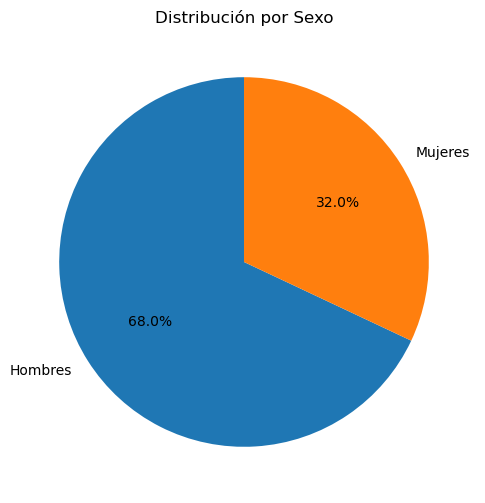

In [47]:
gender_labels = {0: 'Mujeres', 1: 'Hombres'}

# Gráfico de quesos con las nuevas etiquetas
plt.figure(figsize=(6, 6))
df['Sexo'].value_counts().rename(index=gender_labels).plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribución por Sexo')
plt.ylabel('')  # Esto elimina la etiqueta 'Sexo' del eje y
plt.show()


In [48]:
# Contar el número de entradas para cada rango de edad
conteo_rango_edad = df['Rango edad'].value_counts().sort_index()
print(conteo_rango_edad)


0       0
1       0
2     878
3    1463
4    1132
5     427
Name: Rango edad, dtype: int64


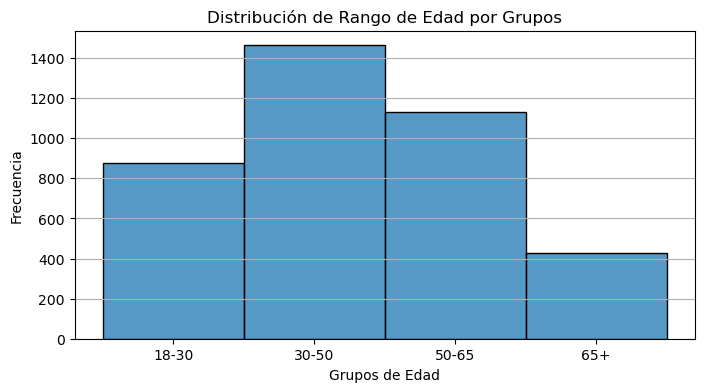

In [49]:
plt.figure(figsize=(8, 4))

# Hacemos el histograma sin la línea KDE
sns.histplot(df['Rango edad'], bins=[1.5, 2.5, 3.5, 4.5, 5.5], kde=False)

# Personalizamos las etiquetas del eje x con los rangos de edad
plt.xticks(ticks=[2, 3, 4, 5], labels=['18-30', '30-50', '50-65', '65+'])

# Añadimos títulos y etiquetas
plt.title('Distribución de Rango de Edad por Grupos')
plt.xlabel('Grupos de Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()

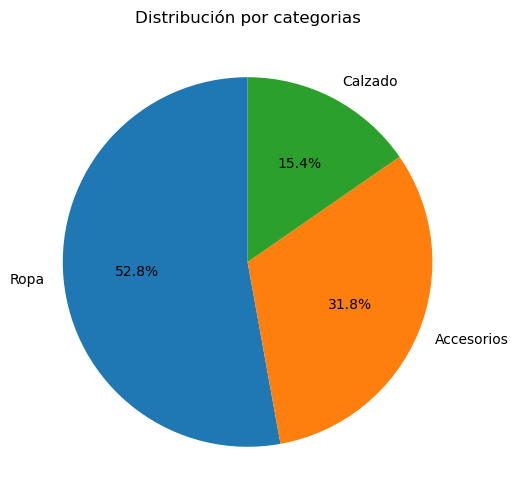

In [50]:
gender_labels = {1: 'Ropa', 2: 'Calzado', 3: 'Accesorios'}

# Gráfico de quesos con las nuevas etiquetas
plt.figure(figsize=(6, 6))
df['Categoria del articulo'].value_counts().rename(index=gender_labels).plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribución por categorias')
plt.ylabel('')  # Esto elimina la etiqueta 'Categoria del articulo' del eje y
plt.show()


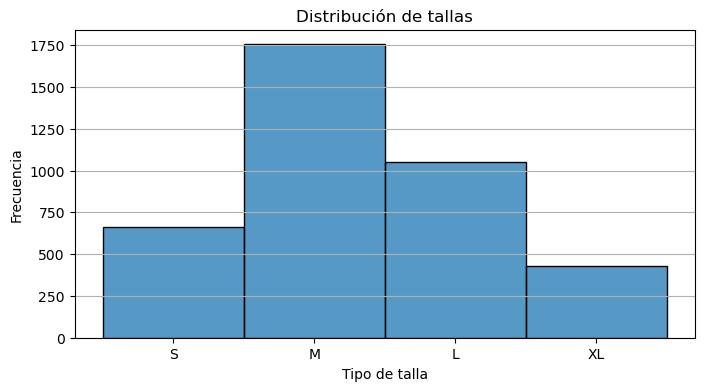

In [51]:
plt.figure(figsize=(8,4))

# Hacemos el histograma sin la línea KDE
sns.histplot(df['Talla'], bins=[0.5,1.5, 2.5, 3.5, 4.5,], kde=False)

# Personalizamos las etiquetas del eje x con los rangos de edad
plt.xticks(ticks=[1, 2, 3, 4,], labels=['S', 'M', 'L', 'XL'])

# Añadimos títulos y etiquetas
plt.title('Distribución de tallas')
plt.xlabel('Tipo de talla')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()

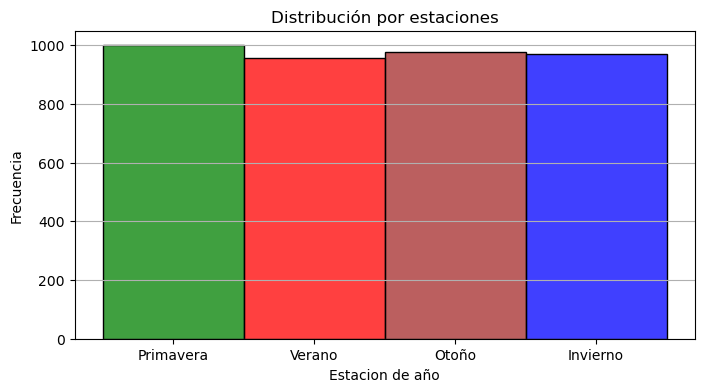

In [52]:
plt.figure(figsize=(8, 4))

# Datos separados por estación
primavera = df[df['Estacion'] == 1]
verano = df[df['Estacion'] == 2]
otoño = df[df['Estacion'] == 3]
invierno = df[df['Estacion'] == 4]

# Graficamos cada conjunto de datos con su color correspondiente
sns.histplot(primavera['Estacion'], bins=[0.5, 1.5], color='green', label='Primavera', kde=False)
sns.histplot(verano['Estacion'], bins=[1.5, 2.5], color='red', label='Verano', kde=False)
sns.histplot(otoño['Estacion'], bins=[2.5, 3.5], color='brown', label='Otoño', kde=False)
sns.histplot(invierno['Estacion'], bins=[3.5, 4.5], color='blue', label='Invierno', kde=False)

# Personalizamos las etiquetas del eje x
plt.xticks(ticks=[1, 2, 3, 4], labels=['Primavera', 'Verano', 'Otoño', 'Invierno'])

# Añadimos títulos y etiquetas
plt.title('Distribución por estaciones')
plt.xlabel('Estacion de año')
plt.ylabel('Frecuencia')
plt.grid(axis='y')

# Mostramos el gráfico
plt.show()


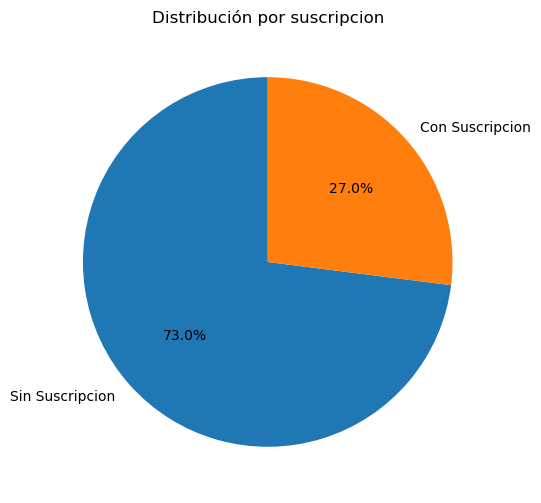

In [53]:
# Diccionario para mapear los valores a etiquetas más descriptivas
gender_labels = {0: 'Sin Suscripcion', 1: 'Con Suscripcion'}

# Gráfico de quesos con las nuevas etiquetas
plt.figure(figsize=(6, 6))
df['Suscripcion'].value_counts().rename(index=gender_labels).plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribución por suscripcion')
plt.ylabel('')  # Esto elimina la etiqueta 'Suscripcion' del eje y
plt.show()


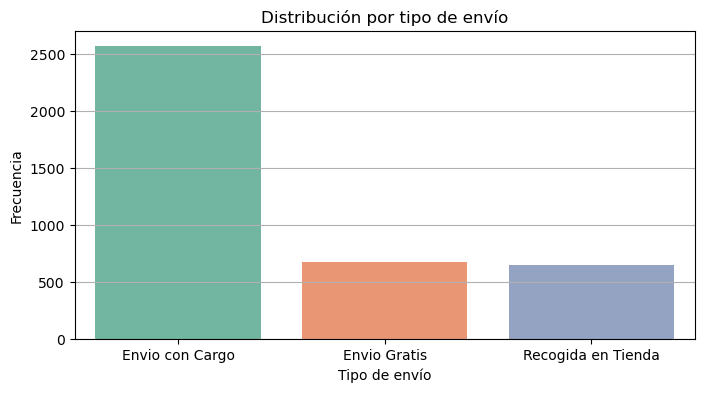

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame y 'Envio' es la columna con valores 0, 1 y 2
# Diccionario para mapear los números a las categorías descriptivas
envio_mapping = {0: 'Envio Gratis', 1: 'Envio con Cargo', 2: 'Recogida en Tienda'}

# Ahora utilizamos countplot de Seaborn para crear el gráfico de barras
# Utilizamos 'replace' para cambiar los valores en el eje x por las etiquetas descriptivas
plt.figure(figsize=(8, 4))
sns.countplot(x=df['Envio'].replace(envio_mapping), palette='Set2')

# Añadimos títulos y etiquetas
plt.title('Distribución por tipo de envío')
plt.xlabel('Tipo de envío')
plt.ylabel('Frecuencia')
plt.grid(axis='y')

# Finalmente, mostramos el gráfico
plt.show()


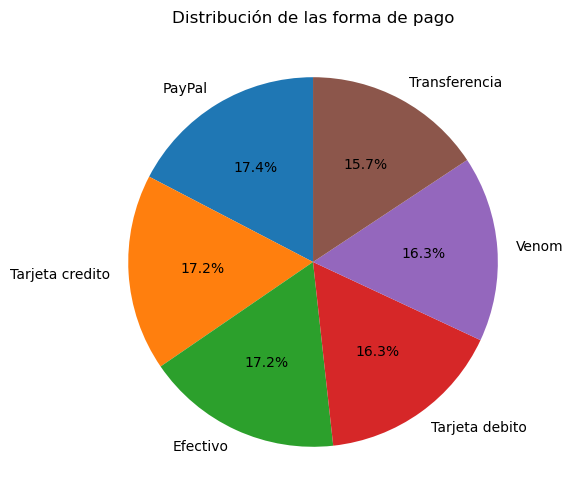

In [55]:
gender_labels = {1: 'Efectivo', 
                 2: 'Transferencia',
                 3: 'Tarjeta debito',
                 4: 'Tarjeta credito',
                 5: 'PayPal',
                 6: 'Venom'}

# Gráfico de quesos con las nuevas etiquetas
plt.figure(figsize=(6, 6))
df['Forma Pago'].value_counts().rename(index=gender_labels).plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribución de las forma de pago')
plt.ylabel('')  # Esto elimina la etiqueta 'Forma Pago' del eje y
plt.show()



In [56]:
df.head()

,Sexo,Rango edad,Categoria del articulo,Importe,Talla,Estacion,Suscripcion,Envio,Forma Pago,Region,Promo,Historico Compras
0,1,4,1,53,3,4,1,1,6,2,1,1
1,1,2,1,64,3,4,1,1,1,3,1,1
2,1,4,1,73,1,1,1,0,4,3,1,1
3,1,2,2,90,2,1,1,1,5,3,1,2
4,1,3,1,49,2,1,1,0,5,1,1,2


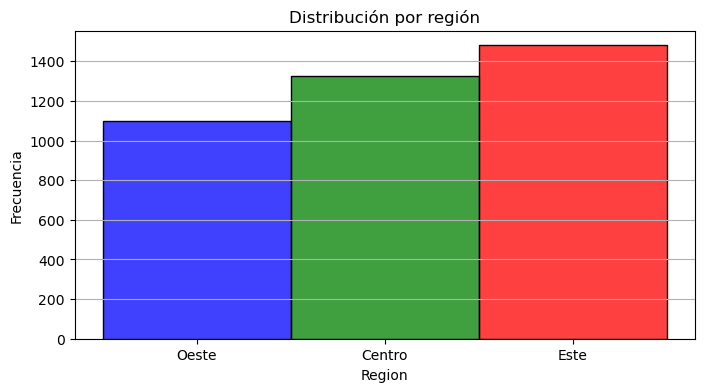

In [57]:
plt.figure(figsize=(8, 4))

# Datos separados por región
oeste = df[df['Region'] == 1]
centro = df[df['Region'] == 2]
este = df[df['Region'] == 3]

# Graficamos cada conjunto de datos con su color correspondiente
sns.histplot(oeste['Region'], bins=[0.5, 1.5], color='blue', label='Oeste', kde=False)
sns.histplot(centro['Region'], bins=[1.5, 2.5], color='green', label='Centro', kde=False)
sns.histplot(este['Region'], bins=[2.5, 3.5], color='red', label='Este', kde=False)

# Personalizamos las etiquetas del eje x
plt.xticks(ticks=[1, 2, 3], labels=['Oeste', 'Centro', 'Este'])

# Añadimos títulos y etiquetas
plt.title('Distribución por región')
plt.ylabel('Frecuencia')
plt.grid(axis='y')

# Mostramos el gráfico
plt.show()


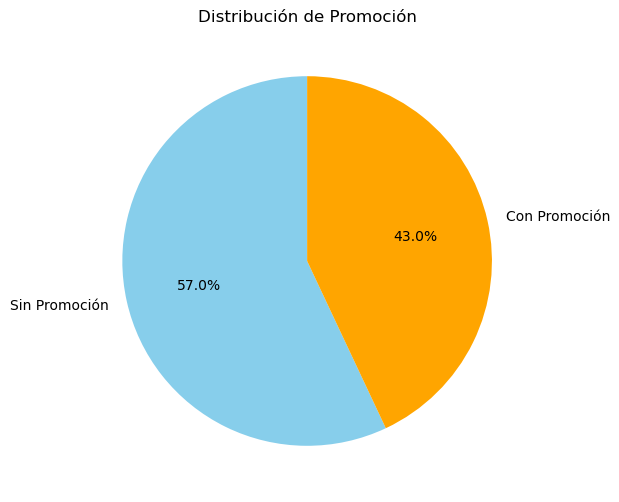

In [58]:
# Contamos las ocurrencias de cada valor
conteo_promo = df['Promo'].value_counts()

# Asignamos las etiquetas a cada parte del gráfico directamente
labels = ['Sin Promoción' if index == 0 else 'Con Promoción' for index in conteo_promo.index]

# Creamos el gráfico de quesos
plt.figure(figsize=(6, 6))
conteo_promo.plot.pie(labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])

# Personalizamos el gráfico
plt.title('Distribución de Promoción')
plt.ylabel('')  # Esto elimina la etiqueta del eje y

# Mostramos el gráfico
plt.show()


In [59]:
# Agrupar por 'Sexo' y calcular el promedio de 'Importe'
promedio_importe_por_sexo = df.groupby('Sexo')['Importe'].mean()

# Imprimir los resultados
print("Promedio de gasto de las mujeres (Sexo = 0):", promedio_importe_por_sexo[0])
print("Promedio de gasto de los hombres (Sexo = 1):", promedio_importe_por_sexo[1])


Promedio de gasto de las mujeres (Sexo = 0): 60.249198717948715
Promedio de gasto de los hombres (Sexo = 1): 59.536199095022624


In [60]:
# Agrupar por 'Region' y calcular el promedio de 'Importe'
promedio_importe_por_region = df.groupby('Region')['Importe'].mean()

# Imprimir los resultados
print("Promedio de gasto en region Oeste = 1):", promedio_importe_por_region[1])
print("Promedio de gasto de region Centro = 2:", promedio_importe_por_region[2])
print("Promedio de gasto de region Este = 2:", promedio_importe_por_region[3])


Promedio de gasto en region Oeste = 1): 60.68886861313869
Promedio de gasto de region Centro = 2: 59.4214501510574
Promedio de gasto de region Este = 2: 59.38648648648649


In [61]:
# Agrupar por 'Rango de edad' y calcular el promedio de 'Importe'
promedio_importe_por_edad = df.groupby('Rango edad')['Importe'].mean()

# Imprimir los resultados
print("Promedio de gasto en region Niños = Menores de 12):", promedio_importe_por_edad[0])
print("Promedio de gasto de region Adolescentes = de 12 a 18 años:", promedio_importe_por_edad[1])
print("Promedio de gasto de region Jovenes = de 18 a 30 años:", promedio_importe_por_edad[2])
print("Promedio de gasto de region Adultos Jovenes = de 30 a 50 años:", promedio_importe_por_edad[3])
print("Promedio de gasto de region Adultos = de 50 a 65 años:", promedio_importe_por_edad[4])
print("Promedio de gasto de region Jubilados = mayores de 65:", promedio_importe_por_edad[5])


Promedio de gasto en region Niños = Menores de 12): nan
Promedio de gasto de region Adolescentes = de 12 a 18 años: nan
Promedio de gasto de region Jovenes = de 18 a 30 años: 60.25626423690205
Promedio de gasto de region Adultos Jovenes = de 30 a 50 años: 59.3069036226931
Promedio de gasto de region Adultos = de 50 a 65 años: 59.996466431095406
Promedio de gasto de region Jubilados = mayores de 65: 59.704918032786885


In [62]:
# Agrupar por 'Articulos' y calcular el promedio de 'Importe'
promedio_importe_por_articulo = df.groupby('Categoria del articulo')['Importe'].mean()

# Imprimir los resultados
print("Promedio de gasto en Ropa):", promedio_importe_por_articulo[1])
print("Promedio de gasto en Calzado:", promedio_importe_por_articulo[2])
print("Promedio de gasto en Accesorios:", promedio_importe_por_articulo[3])


Promedio de gasto en Ropa): 59.576904415332365
Promedio de gasto en Calzado: 60.25542570951586
Promedio de gasto en Accesorios: 59.83870967741935


In [63]:
# Calcular el rango y la desviación estándar de los importes
rango_importe = df['Importe'].max() - df['Importe'].min()
desviacion_estandar_importe = df['Importe'].std()

rango_importe, desviacion_estandar_importe


(80, 23.685392250875307)

In [64]:
df.head()

,Sexo,Rango edad,Categoria del articulo,Importe,Talla,Estacion,Suscripcion,Envio,Forma Pago,Region,Promo,Historico Compras
0,1,4,1,53,3,4,1,1,6,2,1,1
1,1,2,1,64,3,4,1,1,1,3,1,1
2,1,4,1,73,1,1,1,0,4,3,1,1
3,1,2,2,90,2,1,1,1,5,3,1,2
4,1,3,1,49,2,1,1,0,5,1,1,2


In [65]:
# Exportar a CSV
df.to_csv('df_limpio.csv', index=False)


### Problema de Clasificación: Predicción de la Suscripción

Comencemos con la creación de un modelo de clasificación binaria. Para este ejemplo, usaremos la columna "Suscripcion" como nuestra variable objetivo. El objetivo será predecir si un cliente se suscribirá o no basándonos en las demás características del dataframe. Utilizaremos scikit-learn y empezaremos con un modelo simple como la Regresión Logística.










### Ahora, procedamos con el segundo paso: separar los datos en características (X) y objetivo (y).

In [66]:
from sklearn.model_selection import train_test_split

# Separando las características (X) y la variable objetivo (y)
X = df.drop('Suscripcion', axis=1)
y = df['Suscripcion']

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Opcional: Imprime las dimensiones de los conjuntos de datos para verificar
print("Entrenamiento (X): ", X_train.shape)
print("Prueba (X): ", X_test.shape)
print("Entrenamiento (y): ", y_train.shape)
print("Prueba (y): ", y_test.shape)


Entrenamiento (X):  (3120, 11)
Prueba (X):  (780, 11)
Entrenamiento (y):  (3120,)
Prueba (y):  (780,)


In [67]:
# Creando el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000) # Aumentamos max_iter si es necesario

# Entrenando el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Haciendo predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calculando la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del Modelo: ", accuracy)

# Generando un reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:\n", report)

Precisión del Modelo:  0.8256410256410256
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      0.76      0.86       558
           1       0.62      1.00      0.77       222

    accuracy                           0.83       780
   macro avg       0.81      0.88      0.81       780
weighted avg       0.89      0.83      0.83       780



In [68]:
# Creando el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)

# Entrenando el modelo
tree_model.fit(X_train, y_train)

# Haciendo predicciones
y_pred_tree = tree_model.predict(X_test)

# Evaluando el modelo
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Precisión del Árbol de Decisión: ", accuracy_tree)
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_tree))


Precisión del Árbol de Decisión:  0.7923076923076923
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       558
           1       0.64      0.62      0.63       222

    accuracy                           0.79       780
   macro avg       0.74      0.74      0.74       780
weighted avg       0.79      0.79      0.79       780



In [69]:
# Creando el modelo de Bosque Aleatorio
forest_model = RandomForestClassifier(random_state=42)

# Entrenando el modelo
forest_model.fit(X_train, y_train)

# Haciendo predicciones
y_pred_forest = forest_model.predict(X_test)

# Evaluando el modelo
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("Precisión del Bosque Aleatorio: ", accuracy_forest)
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_forest))


Precisión del Bosque Aleatorio:  0.8192307692307692
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87       558
           1       0.65      0.79      0.71       222

    accuracy                           0.82       780
   macro avg       0.78      0.81      0.79       780
weighted avg       0.83      0.82      0.82       780



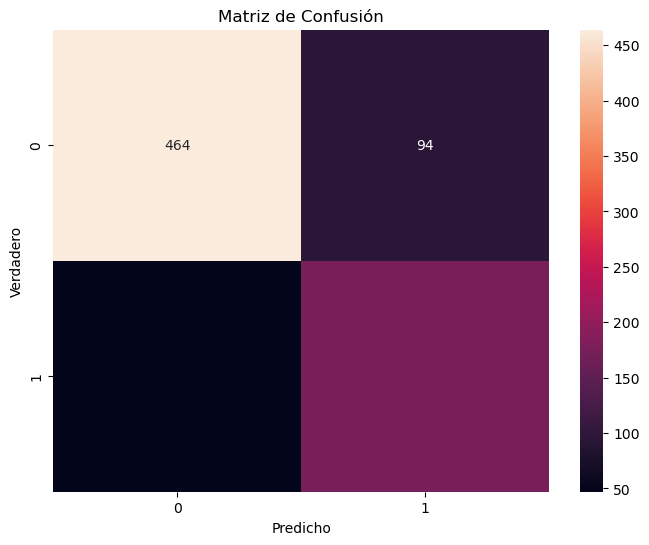

In [70]:
# Generando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_forest)

# Graficando la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Matriz de Confusión')
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()
